<a href="https://colab.research.google.com/github/vrshth/projects/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/vrshth/DataSets/main/healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
df.corr()['stroke']

id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

In [4]:
x=df.drop(['id','stroke','bmi'],axis=1)
x

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   smoking_status  
0             Urban             228.69  formerly smoked  
1             Rural             202.21     never smoked  
2             Rural             105.92     never smoked  
3             Urban             171.23           smokes  
4             Rural             174.12     never smoked  
...             ...                ...              ...  
5105          Urban              83.75     never smoked  
5106          Urban             125.20     never smoked  
5107          Rural              82.99     never smoked  
5108          Rural             166.29  formerly smoked  
5109          Urban              85.28          Unknown  

[5110 rows x 9 columns]

In [5]:
y=df['stroke']

In [6]:
x_numeric=pd.get_dummies(x)
x_numeric

age  hypertension  heart_disease  avg_glucose_level  gender_Female  \
0     67.0             0              1             228.69              0   
1     61.0             0              0             202.21              1   
2     80.0             0              1             105.92              0   
3     49.0             0              0             171.23              1   
4     79.0             1              0             174.12              1   
...    ...           ...            ...                ...            ...   
5105  80.0             1              0              83.75              1   
5106  81.0             0              0             125.20              1   
5107  35.0             0              0              82.99              1   
5108  51.0             0              0             166.29              0   
5109  44.0             0              0              85.28              1   

      gender_Male  gender_Other  ever_married_No  ever_married_Yes  \
0               1             0                0                 1   
1               0             0                0                 1   
2               1             0                0                 1   
3               0             0                0                 1   
4               0             0                0                 1   
...           ...           ...              ...               ...   
5105            0             0                0                 1   
5106            0             0                0                 1   
5107            0             0                0                 1   
5108            1             0                0                 1   
5109            0             0                0                 1   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                      0                       0                  1   
1                      0                       0                  0   
2                      0                       0                  1   
3                      0                       0                  1   
4                      0                       0                  0   
...                  ...                     ...                ...   
5105                   0                       0                  1   
5106                   0                       0                  0   
5107                   0                       0                  0   
5108                   0                       0                  1   
5109                   1                       0                  0   

      work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                           0                   0                     0   
1                           1                   0                     1   
2                           0                   0                     1   
3                           0                   0                     0   
4                           1                   0                     1   
...                       ...                 ...                   ...   
5105                        0                   0                     0   
5106                        1                   0                     0   
5107                        1                   0                     1   
5108                        0                   0                     1   
5109                        0                   0                     0   

      Residence_type_Urban  smoking_status_Unknown  \
0                        1                       0   
1                        0                       0   
2                        0                       0   
3                        1                       0   
4                        0                       0   
...                    ...                     ...   
5105                     1                       0   
5106                     1                       0   
5

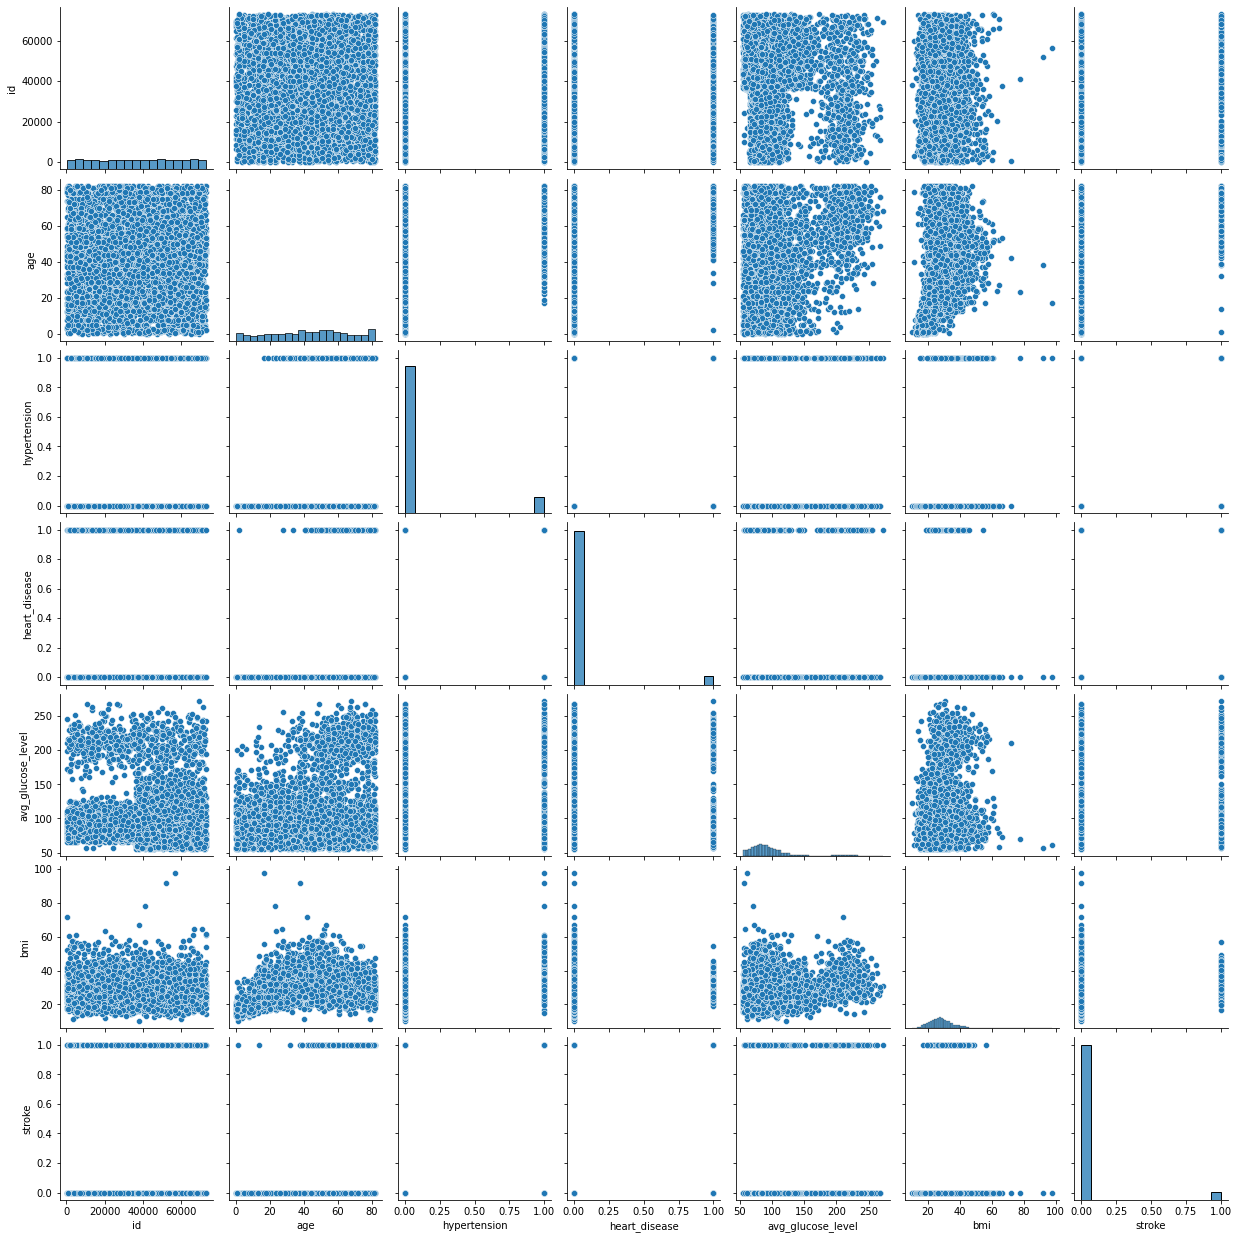

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_numeric,y,test_size=0.25)

In [9]:
from sklearn.preprocessing import MinMaxScaler
x_train_scale=MinMaxScaler().fit_transform(x_train)
x_test_scale=MinMaxScaler().fit_transform(x_test)

In [10]:
import tensorflow as tf
tf.random.set_seed(7)
model_1=tf.keras.models.Sequential([
  tf.keras.layers.Dense(1000,activation='relu'),
  tf.keras.layers.Dense(500,activation='relu'),
  tf.keras.layers.Dense(200,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [11]:
history=model_1.fit(x_train,y_train,
                    epochs=10,
                    validation_data=(x_test,y_test),
                    verbose=0)

In [12]:
model_1.evaluate(x_test,y_test)

40/40 [==============================] - 0s 3ms/step - loss: 0.1837 - accuracy: 0.9523


[0.18370893597602844, 0.9522691965103149]

In [13]:
model_1.save('Stroke Prediction.h5')

In [14]:
loaded_model=tf.keras.models.load_model('Stroke Prediction.h5')

In [15]:
loaded_model.evaluate(x_test,y_test)

40/40 [==============================] - 0s 4ms/step - loss: 0.1837 - accuracy: 0.9523


[0.18370893597602844, 0.9522691965103149]

>The final accuracy of the model is --> 95%